In [1]:
# Transit Timing Example

In [18]:
using NbodyGradient

In [19]:
# Specify the initial conditions:

# Fill in system body parameters
# Default values are zeros
# First, the star 
a = Elements(m = 0.82)

# Next, the planets
b = Elements(
        m = 3.18e-4,
        P = 221.717,
        ecosϖ = 0.0069,
        I = pi/2,
)
c = Elements(
        m = 3e-6,
        P = 228.774,
        t0 = -228.774/6, # < We want mean anomaly to be +60 deg, so its
        ecosϖ  = 0.0054, #   transit should have about occurred 1/6 of an orbit 
        I = pi/2         #   prior to the initial time.
)

# Generate the initial conditions
ic = ElementsIC(0.0,3,a,b,c)

ElementsIC{Float64}
Orbital Elements: 
3×7 Array{Float64,2}:
 0.82        0.0      0.0    0.0     0.0  0.0     0.0
 0.000318  221.717    0.0    0.0069  0.0  1.5708  0.0
 3.0e-6    228.774  -38.129  0.0054  0.0  1.5708  0.0

In [20]:
# Now, pass the ICs to the State struct, which keeps track of the current state of the system
s = State(ic)
s.x # positions 

3×3 Array{Float64,2}:
 -2.16714e-6   -2.16714e-6   0.592581
  1.60063e-20  -4.1079e-17  -2.06854e-17
  0.000261403  -0.670871    -0.337818

In [21]:
# Set up the integrator.
t0 = 0.0        # Initial time
h = 1.0         # Time step
tmax = 9837.282 # Time to integrate to.

intr = Integrator(h, t0, tmax)

Integrator{Float64}(NbodyGradient.ah18!, 1.0, 0.0, 9837.282)

In [22]:
# If we want to calculate transit times,
# simply pass a TransitTiming structure to
# the integrator.

# Pass tmax and the initial conditions. 
# This allocates arrays to hold the transit times
# and derivatives.
tt = TransitTiming(tmax,ic);

In [23]:
# Now, run the integrator!
intr(s,tt)

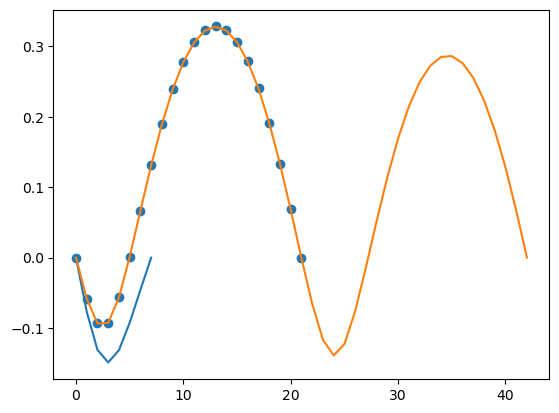

221.80266718923252
221.78389784838888
221.78392439692522


In [24]:
using PyPlot, Statistics

# plot the transit timing variations
t1 = tt.tt[2,1:tt.count[2]]
nplot = [8,22,43]
for iplot=1:3
  pavg = mean(t1[2:nplot[iplot]] - t1[1:nplot[iplot]-1])
  it = collect(0:1:nplot[iplot]-1)
  ttv1 = t1[1:nplot[iplot]] .- it .* pavg .- t1[1]
  if iplot == 2
    scatter(it,ttv1)
  else
    plot(it,ttv1)
  end
  println(pavg)
end